In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
airbnb = pd.read_csv('airbnb.csv') 
airbnb.head(3)


,id,neighborhood,property_type,accommodates,bathrooms,bedrooms,price,security_deposit,cleaning_fee,rating,superhost,response_time,minimum_nights,maximum_nights,latitude,longitude
0,3362,Shaw,Townhouse,16,3.5,4,433,500,250,95.0,0,within an hour,2,365,38.90982,-77.02016
1,3663,Brightwood Park,Townhouse,4,3.5,4,154,0,50,97.0,0,NaN,3,30,38.95888,-77.02554
2,3670,Howard University,Townhouse,2,1.0,1,75,500,25,87.0,0,NaN,2,30,38.91842,-77.02750


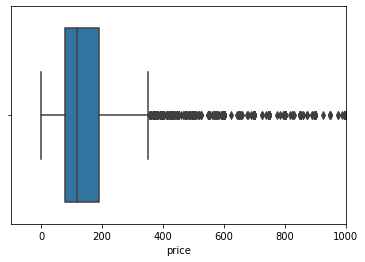

In [5]:
ax = sns.boxplot(x='price', data=airbnb)
ax.set_xlim(-100, 1000);

In [7]:
airbnb['price'].min()

0

In [8]:
airbnb['price'].max()

10000

In [9]:
airbnb['price'].mean()

215.45594903908443

In [10]:
airbnb['price'].median()

118.0

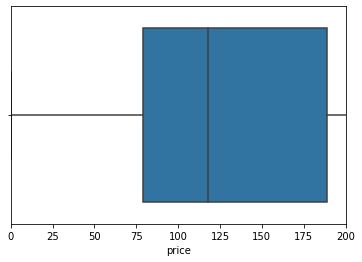

In [11]:
ax = sns.boxplot(x='price', data=airbnb)
ax.set_xlim(0, 200);

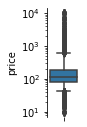

In [12]:
fig, ax = plt.subplots(figsize=(.6, 2)) 
sns.boxplot(y='price', data=airbnb, ax=ax, whis=(5, 95)) 
ax.set_yscale('log') 
sns.despine(ax=ax, bottom=True)


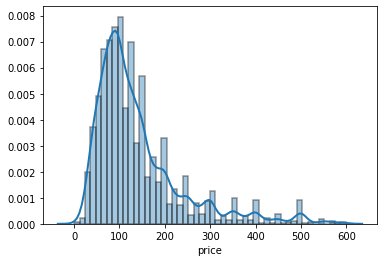

In [13]:
price_600 = airbnb.query('price < 600')['price'] 
sns.distplot(price_600, hist_kws={'lw': 1.5, 'ec': 'black'}, kde_kws={'lw': 2});

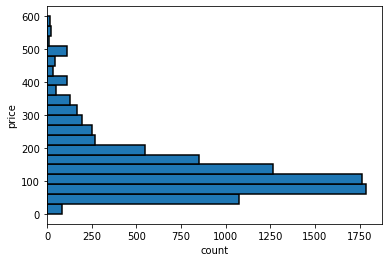

In [14]:
ax = sns.distplot(price_600, bins=20, hist_kws={'lw': 1.5, 'ec': 'black', 'alpha': 1}, kde=False, vertical=True) 
ax.set_xlabel('count');


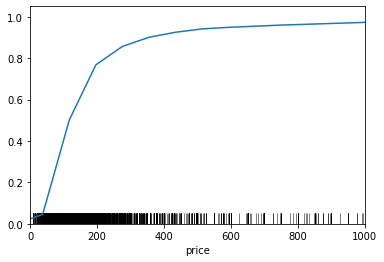

In [15]:
ax = sns.distplot(airbnb['price'], hist=False, rug=True, kde_kws={'cumulative': True}, rug_kws={'lw': .5, 'color':'black'}) 
ax.set_xlim(0, 1000);

# housing
# GrLivArea: Above grade (ground) living area square feet
# OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [17]:
cols = ['OverallQual', 'GrLivArea', 'SalePrice'] 
housing = pd.read_csv('housing.csv', usecols=cols) 
housing.head(3)


,OverallQual,GrLivArea,SalePrice
0,7,1710,208500
1,6,1262,181500
2,7,1786,223500


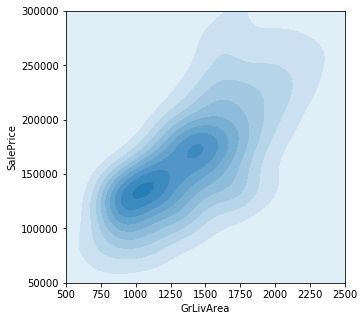

In [19]:
fig, ax = plt.subplots(figsize=(5, 5)) 
sns.kdeplot(data=housing['GrLivArea'], data2=housing['SalePrice'], shade=True, clip=((500, 2_500), (50_000, 300_000)), ax=ax);


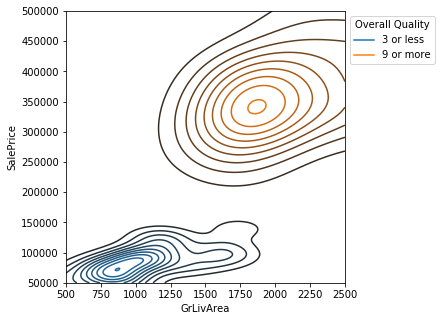

In [24]:
fig, ax = plt.subplots(figsize=(5, 5)) 
df = housing.query('OverallQual <= 3') 
sns.kdeplot(data=df['GrLivArea'], data2=df['SalePrice'], clip=((500, 2_500), (50_000, 300_000)), ax=ax, label='3 or less')
df = housing.query('OverallQual >= 9') 
sns.kdeplot(data=df['GrLivArea'], data2=df['SalePrice'], clip=((500, 2_500), (50_000, 500_000)), ax=ax, label='9 or more') 
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Overall Quality');


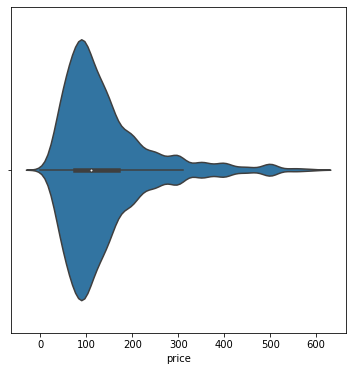

In [29]:
fig, ax = plt.subplots(figsize=(6, 6)) 
sns.violinplot(x='price', data=airbnb.query('price < 600'), ax=ax);


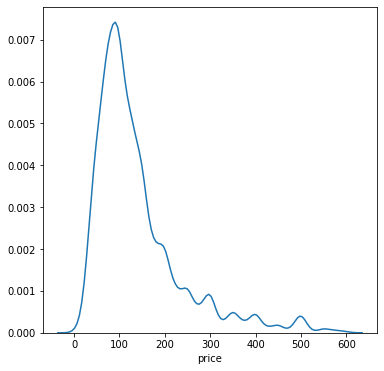

In [30]:
 fig, ax = plt.subplots(figsize=(6, 6)) 
sns.distplot(price_600, hist=False, ax=ax)

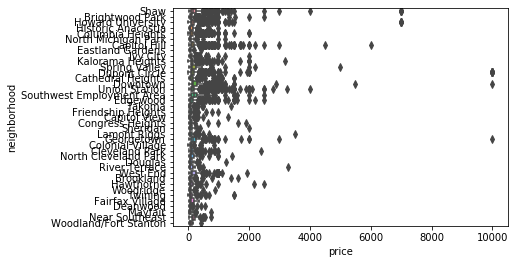

In [31]:
sns.boxplot(x='price', y='neighborhood', data=airbnb)

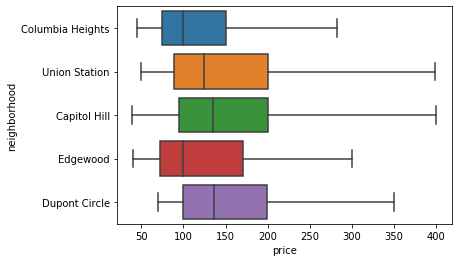

In [32]:
top5 = airbnb['neighborhood'].value_counts().index[:5] 
sns.boxplot(x='price', y='neighborhood', data=airbnb, order=top5, whis=(5, 90), showfliers=False);


In [41]:
top5 = airbnb['neighborhood'].value_counts().index[:5]
top5

Index(['Columbia Heights', 'Union Station', 'Capitol Hill', 'Edgewood',
       'Dupont Circle'],
      dtype='object')

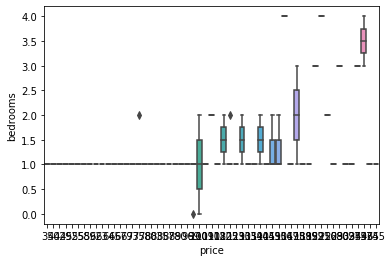

In [42]:
 sns.boxplot(x='price', y='bedrooms', data=airbnb.head(100));


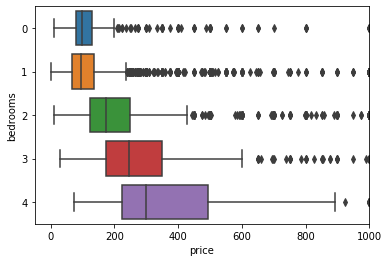

In [43]:
 ax = sns.boxplot(x='price', y='bedrooms', data=airbnb, orient='h', order=[0, 1, 2, 3, 4]) 
ax.set_xlim(-50, 1_000);

In [44]:
airbnb['bedrooms'].value_counts()

1     5539
2     1774
0      902
3      715
4      222
5       70
6       23
7        9
9        3
8        3
11       1
10       1
Name: bedrooms, dtype: int64

In [1]:
##

In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
emp = pd.read_csv('employee.csv') 
emp.head(3)


,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black


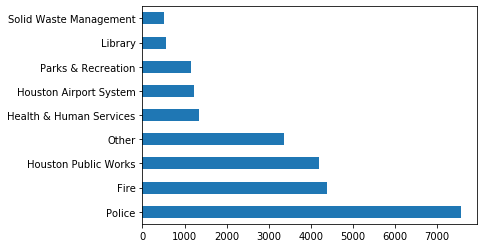

In [4]:
emp['dept'].value_counts().plot(kind='barh')

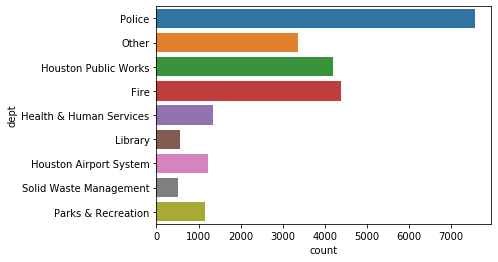

In [7]:
sns.countplot(y='dept',data=emp)

In [8]:
emp.head()

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White


In [12]:
emp.groupby('race')['salary'].mean()

race
Asian              65316.197885
Black              52264.180833
Hispanic           54811.349584
Native American    58153.109371
White              66611.692973
Name: salary, dtype: float64

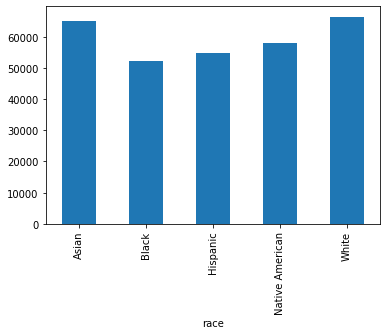

In [11]:
emp.groupby('race')['salary'].mean().plot(kind='bar')

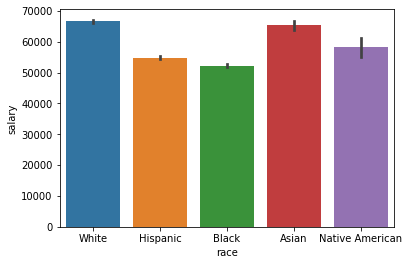

In [13]:
sns.barplot(x='race',y='salary',data=emp,)

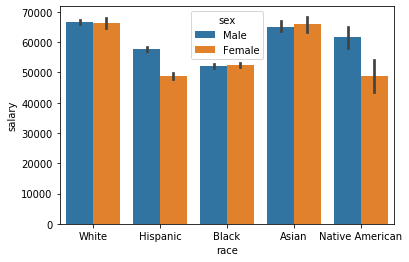

In [19]:
sns.barplot(x='race',y='salary',hue='sex',data=emp);

In [15]:
emp.groupby(['race','sex'])['salary'].mean()

race             sex   
Asian            Female    65846.027190
                 Male      65071.505725
Black            Female    52416.790860
                 Male      52154.353471
Hispanic         Female    48835.416765
                 Male      57637.428134
Native American  Female    48767.227179
                 Male      61672.815192
White            Female    66411.819615
                 Male      66653.901622
Name: salary, dtype: float64

In [16]:
emp.groupby(['race','sex'])['salary'].mean().unstack()

sex,Female,Male
race,,
Asian,65846.027190,65071.505725
Black,52416.790860,52154.353471
Hispanic,48835.416765,57637.428134
Native American,48767.227179,61672.815192
White,66411.819615,66653.901622


In [17]:
emp.groupby(['race','sex'])['salary'].mean().unstack('sex')

sex,Female,Male
race,,
Asian,65846.027190,65071.505725
Black,52416.790860,52154.353471
Hispanic,48835.416765,57637.428134
Native American,48767.227179,61672.815192
White,66411.819615,66653.901622


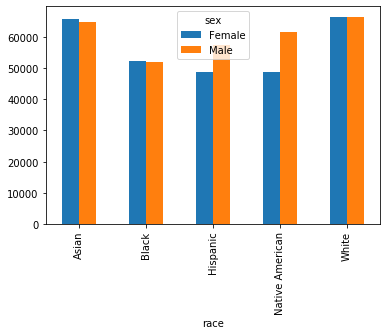

In [18]:
emp.groupby(['race','sex'])['salary'].mean().unstack().plot(kind='bar')

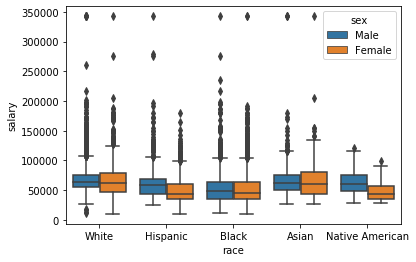

In [20]:
sns.boxplot(x='race',y='salary',hue='sex',data=emp);

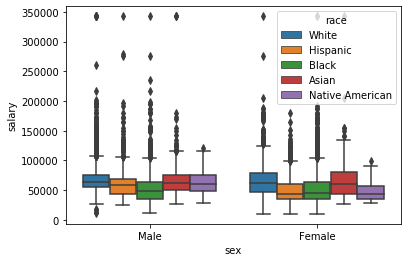

In [22]:
sns.boxplot(x='sex',y='salary',hue='race',data=emp);

In [23]:
# 

In [24]:
emp.head(3)

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black


In [29]:
df=pd.read_csv('emp.csv',parse_dates=['HIRE_DATE','JOB_DATE'])

In [30]:
df.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [34]:
days_hired=pd.to_datetime('08-31-2021')-df['HIRE_DATE']

In [36]:
one_year=pd.Timedelta(1,unit='Y')

C:\Users\soheb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [37]:
one_year

Timedelta('365 days 05:49:12')

In [38]:
df['YEARS_EXPERIENCE']=days_hired/one_year

In [39]:
df.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,YEARS_EXPERIENCE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13,15.220025
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18,21.117477
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03,6.573715
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25,39.560018
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22,32.200524


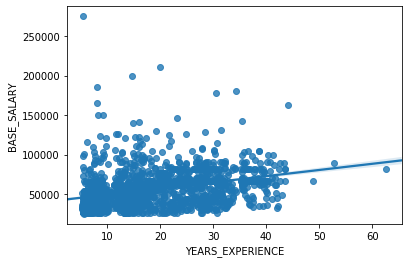

In [40]:
ax=sns.regplot(x='YEARS_EXPERIENCE',y='BASE_SALARY',data=df)

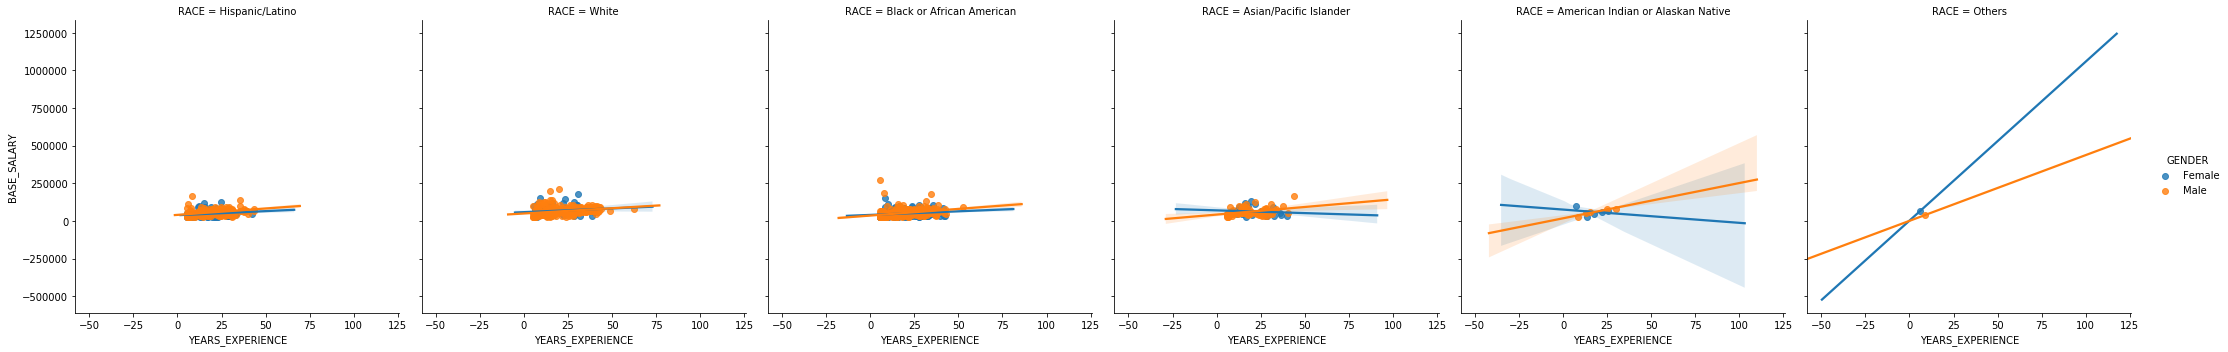

In [49]:
g=sns.lmplot(x='YEARS_EXPERIENCE',y='BASE_SALARY',hue='GENDER',col='RACE',data=df)

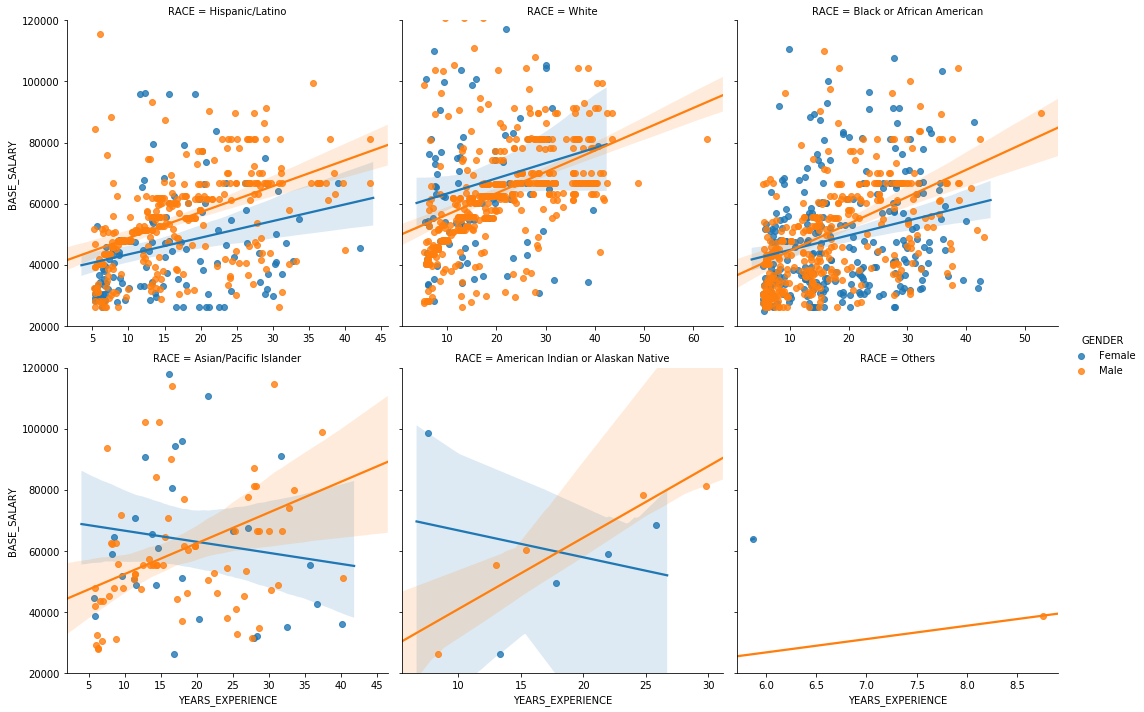

In [52]:
grid=sns.lmplot(x='YEARS_EXPERIENCE',y='BASE_SALARY',hue='GENDER',col='RACE',col_wrap=3,sharex=False,data=df)
grid.set(ylim=(20000,120000))